## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd
import ast                      # convert string to list after importing csv data
import pickle

# Libraries to cluster data
from sklearn.cluster import KMeans

# Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.cm as cm
from cluster_visualization_helper import (
    visualize_cluster)  # user-defined functions

# Libraries for evaluation
from sklearn import metrics

# Libraries for monitoring operation process
from datetime import datetime
from tqdm import tqdm

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
RESULT_DIR = BASE_DIR + "RESULTS/"

SEED = 6886
%matplotlib inline

## Import data

In [3]:
skill_embeddings = np.load(OUTPUT_DIR + "skill_feat_halfsize_embeddings.npy")
skill_embeddings.shape

(257205, 150)

In [10]:
skill_docs = pd.read_csv(
    OUTPUT_DIR + "skill_tokens_long_df.csv",
    converters={
        "skill_token": ast.literal_eval,
    },
    dtype={
        "key_id": int,
        "skill_id": int,
        "job_id": int,
        "column_type": str,
        "skill": str,
        "skill_lemma": str
    }
)
skill_docs.shape

(257205, 9)

In [11]:
# skill_docs = skill_docs_full.loc[skill_docs_full['column_type'] != 'job_requirement']
# skill_docs.shape

In [12]:
skill_docs

,row_id,key_id,job_id,skill_id,column_id,column_type,skill,skill_lemma,skill_token
0,10101,101,1,1,1,job_description,ameria investment consulting company,ameria investment consult company,"[ameria, investment, consult, company]"
1,10201,102,1,2,1,job_description,requires high level,require high level,"[require, high, level]"
2,10301,103,1,3,1,job_description,provides highly responsible,provide highly responsible,"[provide, highly, responsible]"
3,10401,104,1,4,1,job_description,complex staff assistance,complex staff assistance,"[complex, staff, assistance]"
4,10501,105,1,5,1,job_description,chief financial officer,chief financial officer,"[chief, financial, officer]"
...,...,...,...,...,...,...,...,...,...
257200,190010103,1900101,19001,1,3,job_qualification,ra financial system,ra financial system,"[ra, financial, system]"
257201,190010203,1900102,19001,2,3,job_qualification,higher legal education,high legal education,"[high, legal, education]"
257202,190010303,1900103,19001,3,3,job_qualification,high pressure environment,high pressure environment,"[high, pressure, environment]"
257203,190010403,1900104,19001,4,3,job_qualification,professional work experience,professional work experience,"[professional, work, experience]"


## Clustering data

### K-means

In [13]:
def kmeans_clusterer(X, k, seed=SEED):
    """Generate clusters and print Silhouette metrics using Kmeans

    Args:
        X: Matrix of features
        k: Number of clusters
        seed: Seed number to ensure reproducibility

    Returns:
        Trained clustering model based on X.
    """

    km = KMeans(n_clusters=k, random_state=seed).fit(X)

    return km

In [14]:
# Define search space for tuning hyperparameters
X = skill_embeddings
tuning_result = {
    "n_clusters": [],
    "duration": [],
    "n_iters": [],
}
# duration_list = []
model_list = []
label_list = []
# k_range = list(range(2, 301))
k_range = list(range(5, 25, 5))
k_range.extend(list(range(25, 110, 25)))
k_range.extend([150, 200, 250, 300])
len(k_range), k_range

(12, [5, 10, 15, 20, 25, 50, 75, 100, 150, 200, 250, 300])

In [15]:
# Tuning hyperparameter
start_loop_time = datetime.now()
print('Start loop', start_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))

for k in tqdm(k_range):
    # Train model
    starttime = datetime.now()
    print('Start', starttime.strftime('%Y-%m-%d %H:%M:%S.%f'))

    clusterer = kmeans_clusterer(
        X,
        k,
        SEED
    )

    endtime = datetime.now()
    print('End', endtime.strftime('%Y-%m-%d %H:%M:%S.%f'))
    print('Duration', endtime - starttime)

    # Save model
    pickle.dump(
        clusterer,
        open(
            OUTPUT_DIR
            + "kmeans/"
            + "skill_kmeans_model_k-"
            + str(k)
            + ".pkl",
            "wb",
        ),
    )

    # Write result into list
    model_list.append(clusterer)
    label_list.append(clusterer.labels_)
    tuning_result['n_clusters'].append(k)
    tuning_result['n_iters'].append(clusterer.n_iter_)
    tuning_result['duration'].append(round((endtime - starttime).seconds/60, 2))

end_loop_time = datetime.now()
print('End loop', end_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))
print('Duration', end_loop_time - start_loop_time)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

Start loop 2021-05-18 10:39:04.998417
Start 2021-05-18 10:39:05.000413


  8%|██████▉                                                                            | 1/12 [00:17<03:10, 17.31s/it]

End 2021-05-18 10:39:22.309095
Duration 0:00:17.308682
Start 2021-05-18 10:39:22.311094


 17%|█████████████▊                                                                     | 2/12 [00:45<03:55, 23.53s/it]

End 2021-05-18 10:39:50.196105
Duration 0:00:27.885011
Start 2021-05-18 10:39:50.198106


 25%|████████████████████▊                                                              | 3/12 [01:22<04:26, 29.64s/it]

End 2021-05-18 10:40:27.094120
Duration 0:00:36.896014
Start 2021-05-18 10:40:27.097120


 33%|███████████████████████████▋                                                       | 4/12 [02:07<04:45, 35.72s/it]

End 2021-05-18 10:41:12.150139
Duration 0:00:45.053019
Start 2021-05-18 10:41:12.152138


 42%|██████████████████████████████████▌                                                | 5/12 [03:03<05:02, 43.18s/it]

End 2021-05-18 10:42:08.553175
Duration 0:00:56.401037
Start 2021-05-18 10:42:08.556175


 50%|█████████████████████████████████████████▌                                         | 6/12 [04:40<06:08, 61.41s/it]

End 2021-05-18 10:43:45.339854
Duration 0:01:36.783679
Start 2021-05-18 10:43:45.342858


 58%|████████████████████████████████████████████████▍                                  | 7/12 [07:11<07:33, 90.69s/it]

End 2021-05-18 10:46:16.308937
Duration 0:02:30.966079
Start 2021-05-18 10:46:16.312939


 67%|██████████████████████████████████████████████████████▋                           | 8/12 [11:00<08:58, 134.69s/it]

End 2021-05-18 10:50:05.203198
Duration 0:03:48.890259
Start 2021-05-18 10:50:05.206202


 75%|█████████████████████████████████████████████████████████████▌                    | 9/12 [16:09<09:27, 189.26s/it]

End 2021-05-18 10:55:14.463264
Duration 0:05:09.257062
Start 2021-05-18 10:55:14.467264


 83%|███████████████████████████████████████████████████████████████████▌             | 10/12 [23:11<08:42, 261.04s/it]

End 2021-05-18 11:02:16.234418
Duration 0:07:01.767154
Start 2021-05-18 11:02:16.239387


 92%|██████████████████████████████████████████████████████████████████████████▎      | 11/12 [30:58<05:24, 324.08s/it]

End 2021-05-18 11:10:03.249291
Duration 0:07:47.009904
Start 2021-05-18 11:10:03.252240


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [40:02<00:00, 200.20s/it]

End 2021-05-18 11:19:07.308436
Duration 0:09:04.056196
End loop 2021-05-18 11:19:07.434830
Duration 0:40:02.436413


In [16]:
tuning_result["inertia"] = []
tuning_result["inertia_error"] = []

tqdm_bar = tqdm(desc="Computing inertia", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        inertia = model_list[i].inertia_
        tuning_result["inertia_error"].append("None")
    except Exception as e:
        print(e)
        inertia = -1.1
        tuning_result["inertia_error"].append(e)
    tuning_result["inertia"].append(inertia)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing inertia: 100%|█████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 4001.56it/s]


In [17]:
tuning_result["silhouette"] = []
tuning_result["silhouette_error"] = []

tqdm_bar = tqdm(desc="Computing Silhouette score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        silhouette = metrics.silhouette_score(
            X, label_list[i], sample_size=10000, random_state=SEED, n_jobs=-1
        )
        tuning_result["silhouette_error"].append("None")
    except Exception as e:
        print(e)
        silhouette = -1.1
        tuning_result["silhouette_error"].append(e)
    tuning_result["silhouette"].append(silhouette)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Silhouette score: 100%|██████████████████████████████████████████████████████| 12/12 [00:37<00:00,  3.15s/it]


In [18]:
tuning_result["calinski_harabasz"] = []
tuning_result["calinski_harabasz_error"] = []

tqdm_bar = tqdm(desc="Computing Calinski Harabasz score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        calinski_harabasz = metrics.calinski_harabasz_score(X, label_list[i])
        tuning_result["calinski_harabasz_error"].append("None")
    except Exception as e:
        print(e)
        calinski_harabasz = -1.1
        tuning_result["calinski_harabasz_error"].append(e)
    tuning_result["calinski_harabasz"].append(calinski_harabasz)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Calinski Harabasz score: 100%|███████████████████████████████████████████████| 12/12 [00:06<00:00,  1.79it/s]


In [19]:
tuning_result["davies_bouldin"] = []
tuning_result["davies_bouldin_error"] = []

tqdm_bar = tqdm(desc="Computing Davies Bouldin score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        davies_bouldin = metrics.davies_bouldin_score(X, label_list[i])
        tuning_result["davies_bouldin_error"].append("None")
    except Exception as e:
        print(e)
        davies_bouldin = -1.1
        tuning_result["davies_bouldin_error"].append(e)
    tuning_result["davies_bouldin"].append(davies_bouldin)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Davies Bouldin score: 100%|██████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.35it/s]


In [20]:
# Display tuning results
tuning_result_df = pd.DataFrame(tuning_result)
tuning_result_df

,n_clusters,duration,n_iters,inertia,inertia_error,silhouette,silhouette_error,calinski_harabasz,calinski_harabasz_error,davies_bouldin,davies_bouldin_error
0,5,0.28,56,1.758757e+06,None,0.047545,None,8401.464221,None,3.365951,None
1,10,0.45,67,1.633854e+06,None,0.053192,None,6203.959582,None,3.427145,None
2,15,0.60,91,1.560936e+06,None,0.067682,None,5032.666377,None,3.358283,None
3,20,0.75,36,1.499865e+06,None,0.080461,None,4410.358825,None,2.915311,None
4,25,0.93,101,1.448280e+06,None,0.073127,None,3997.504610,None,2.876409,None
5,50,1.60,59,1.283400e+06,None,0.101840,None,2883.508693,None,2.608798,None
6,75,2.50,56,1.196214e+06,None,0.121068,None,2301.569766,None,2.438996,None
7,100,3.80,52,1.129335e+06,None,0.123749,None,1975.862844,None,2.474880,None
8,150,5.15,69,1.036657e+06,None,0.134944,None,1584.144972,None,2.294808,None
9,200,7.02,68,9.751526e+05,None,0.147557,None,1342.140461,None,2.229815,None


In [21]:
# Save tuning results
tuning_result_df.to_csv(
    RESULT_DIR + "kmeans/" + "skill_kmeans_tuning_result.csv", index=False
)

In [22]:
# Combine model sets
tuple_objects = (
    model_list,
    label_list,
    tuning_result,
)
len(tuple_objects), len(tuple_objects[0])

(3, 12)

In [23]:
# Save tuple of model sets
pickle.dump(
    tuple_objects, open(RESULT_DIR + "kmeans/" + "skill_model_tuning_list.pkl", "wb")
)

## Evaluate cluster performance

#### Inertia

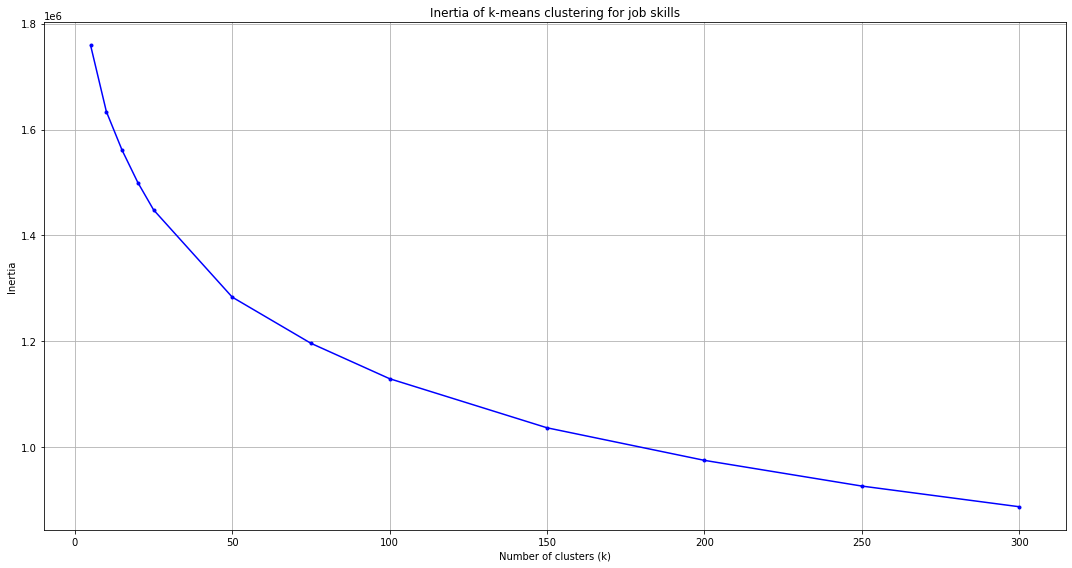

In [24]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["inertia"], "b.-")
plt.title("Inertia of k-means clustering for job skills")
plt.xlabel("Number of clusters (k)")
# plt.xticks(np.unique(tuning_result["n_clusters"]))
plt.ylabel("Inertia")
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "kmeans/" + "skill_kmeans_inertia_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Display plot
plt.show()

#### Silhoulette score

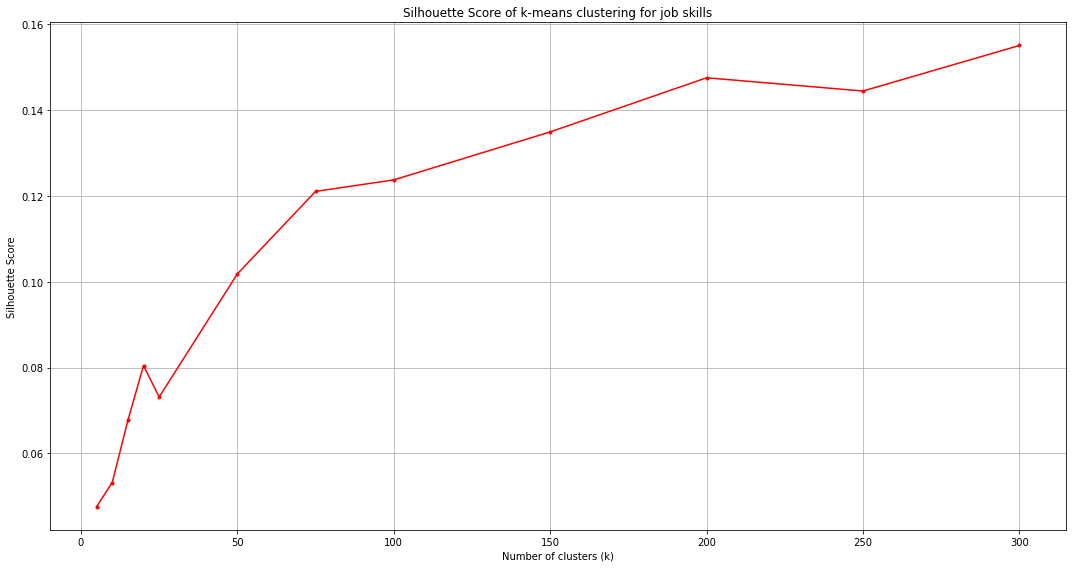

In [25]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["silhouette"], "r.-")
plt.title("Silhouette Score of k-means clustering for job skills")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Silhouette Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "kmeans/" + "skill_kmeans_silhouette_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

#### Calinski Harabasz Score

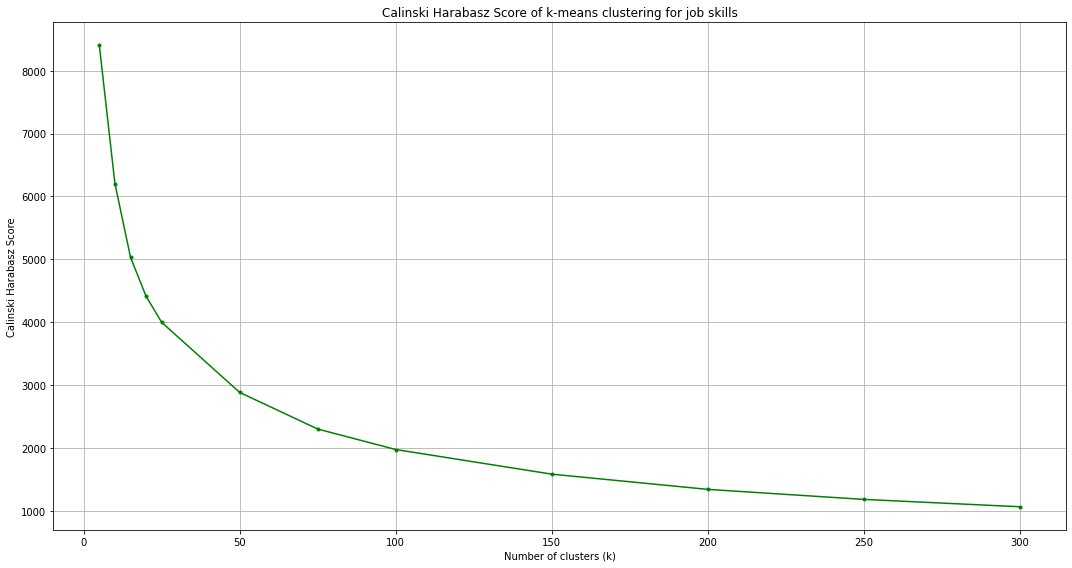

In [26]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["calinski_harabasz"], "g.-")
plt.title("Calinski Harabasz Score of k-means clustering for job skills")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Calinski Harabasz Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "kmeans/" + "skill_kmeans_calinski_harabasz_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

#### Davies-Bouldin Score

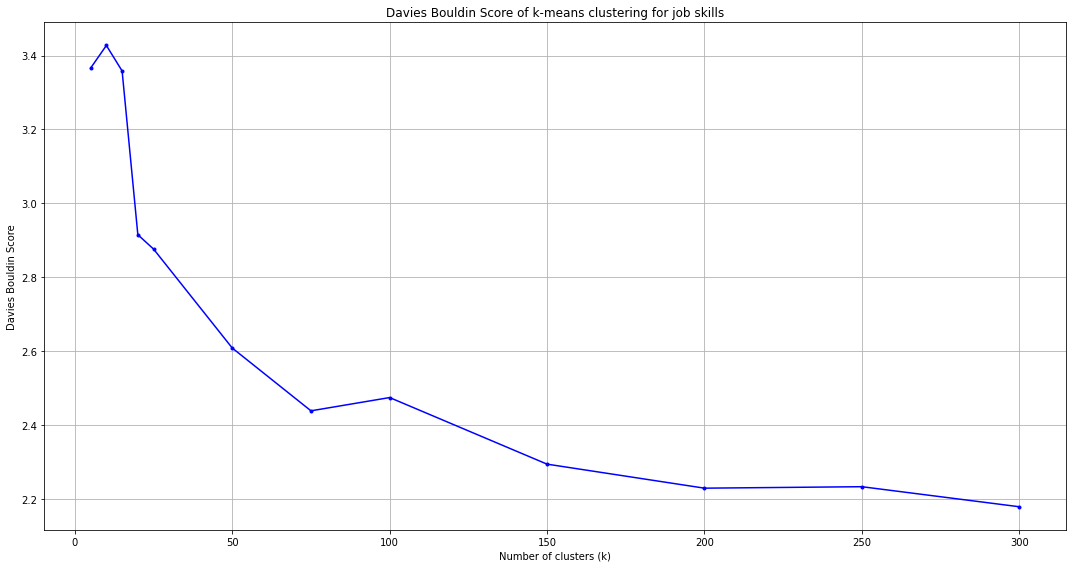

In [27]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["davies_bouldin"], "b.-")
plt.title("Davies Bouldin Score of k-means clustering for job skills")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Davies Bouldin Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "kmeans/" + "skill_kmeans_davies_bouldin_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

## Visualize clusters

In [37]:
# best_index = np.argmax(tuning_result['silhouette'])
best_index = int(np.where(np.array(tuning_result['n_clusters']) == 75)[0])
print('Index of best model =', best_index)

best_k = tuning_result['n_clusters'][best_index]
print(f'Optimal number of clusters (k) = {best_k}')

best_labels = label_list[best_index]

Index of best model = 6
Optimal number of clusters (k) = 75


In [38]:
pca_datapoint = np.load(OUTPUT_DIR + "visualization/" + "skill_halfsize_pca_datapoints.npy")
umap_datapoint = np.load(OUTPUT_DIR + "visualization/" + "skill_halfsize_umap_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "visualization/" + "skill_halfsize_tsne_datapoints.npy")

Start PCA 2021-05-18 11:36:15.236662
End PCA 2021-05-18 11:36:15.269703
PCA duration 0:00:00.033041

Start t-SNE 2021-05-18 11:36:15.269703
End t-SNE 2021-05-18 11:36:15.298717
t-SNE duration 0:00:00.029014

Start UMAP 2021-05-18 11:36:15.298717
End UMAP 2021-05-18 11:36:15.324721
UMAP duration 0:00:00.026004



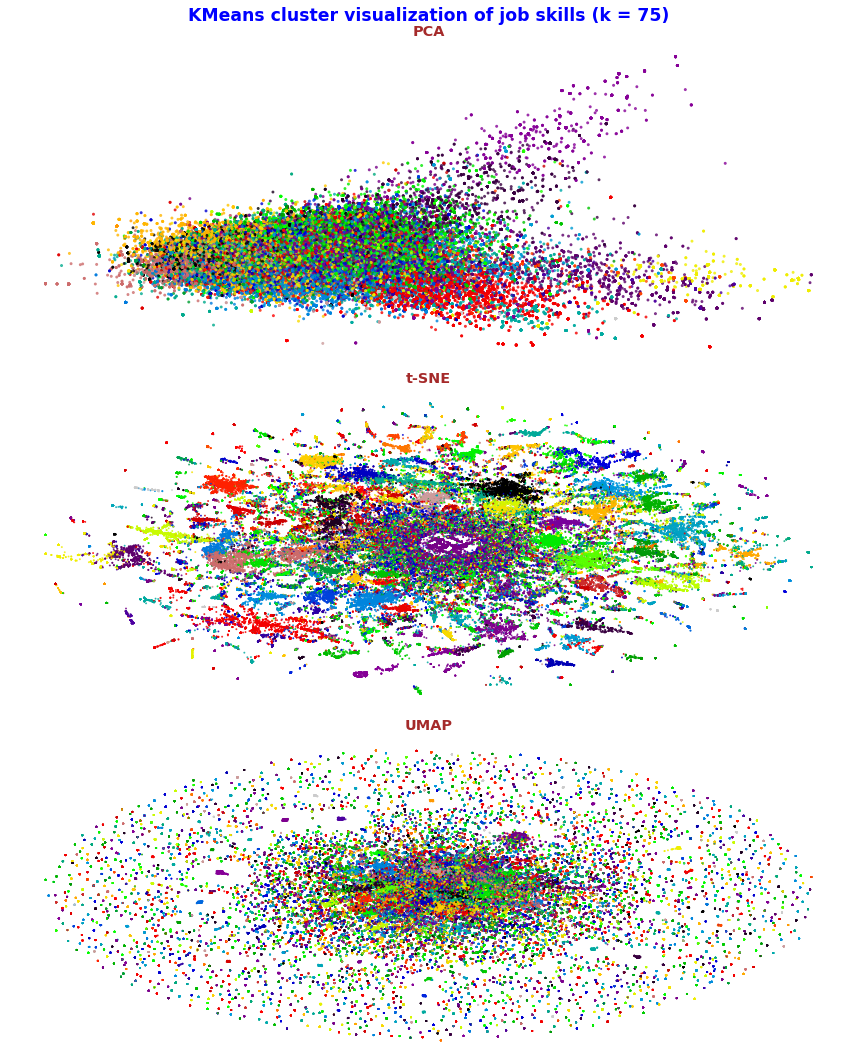

In [39]:
plot_title = f"KMeans cluster visualization of job skills (k = {best_k})"
plot_filename = (
    RESULT_DIR + "kmeans/" + "skill_kmeans_optimal-cluster-visualization.png"
)
palette = sns.color_palette("nipy_spectral", as_cmap=True)
# colors = cm.nipy_spectral(best_labels.astype(float) / best_k)
colors = best_labels

# Visualize clusters with PCA, UMAP, and t-SNE
visualize_cluster(
    plot_title,
    (12, 15),
    colors,
    palette,
    4,
    pca_datapoint,
    tsne_datapoint,
    umap_datapoint,
    pca=True,
    tsne=True,
    compute_umap=True,
    save_plots=True,
    plot_file=plot_filename,
)

## Display top words of each cluster

In [40]:
df_clusters = skill_docs.copy(deep=True)
df_clusters["model_type"] = "kmeans"
df_clusters["skill_n_clusters"] = best_k
df_clusters['skill_cluster_label'] = best_labels
df_clusters

,row_id,key_id,job_id,skill_id,column_id,column_type,skill,skill_lemma,skill_token,model_type,skill_n_clusters,skill_cluster_label
0,10101,101,1,1,1,job_description,ameria investment consulting company,ameria investment consult company,"[ameria, investment, consult, company]",kmeans,75,69
1,10201,102,1,2,1,job_description,requires high level,require high level,"[require, high, level]",kmeans,75,1
2,10301,103,1,3,1,job_description,provides highly responsible,provide highly responsible,"[provide, highly, responsible]",kmeans,75,32
3,10401,104,1,4,1,job_description,complex staff assistance,complex staff assistance,"[complex, staff, assistance]",kmeans,75,2
4,10501,105,1,5,1,job_description,chief financial officer,chief financial officer,"[chief, financial, officer]",kmeans,75,4
...,...,...,...,...,...,...,...,...,...,...,...,...
257200,190010103,1900101,19001,1,3,job_qualification,ra financial system,ra financial system,"[ra, financial, system]",kmeans,75,70
257201,190010203,1900102,19001,2,3,job_qualification,higher legal education,high legal education,"[high, legal, education]",kmeans,75,5
257202,190010303,1900103,19001,3,3,job_qualification,high pressure environment,high pressure environment,"[high, pressure, environment]",kmeans,75,25
257203,190010403,1900104,19001,4,3,job_qualification,professional work experience,professional work experience,"[professional, work, experience]",kmeans,75,70


In [42]:
wordcount = {}
sorted_wordcount = {}
for i in range(best_k):
    skills = df_clusters[df_clusters['skill_cluster_label'] == i]["skill"].values
    skills = ' '.join(' '.join(skills).split())
    wordcount[i] = {}
    for j in skills.split():
        if j in wordcount[i]:
            wordcount[i][j] += 1
        else:
            wordcount[i][j] = 1
    sorted_wordcount[i] = sorted(wordcount[i].items(), key=lambda x: x[1], reverse=True)

In [43]:
# tmp = df_clusters.copy(deep=True)
# tmp = tmp.loc[tmp['skill_cluster_label'] == 24]
# tmp.iloc[50:100, ]

In [72]:
topwords = {}
for key, i in sorted_wordcount.items():
    print("Cluster "+str(key)+": ", end='')
    topwords[key] = ''
    n = 0
    for newkey, j in sorted_wordcount[key][:10]:
        print(newkey + '|', end='')
        topwords[key] = topwords[key] + newkey + '|'
        if n == 10:
            print('\n------------ ', end = '')
        n += 1
    print()

Cluster 0: skills|work|experience|development|communication|unprovided|software|good|technical|excellent|
Cluster 1: skills|work|experience|development|unprovided|team|provide|communication|technical|software|
Cluster 2: skills|work|unprovided|experience|software|development|excellent|management|good|team|
Cluster 3: skills|unprovided|work|experience|software|development|management|team|good|communication|
Cluster 4: skills|work|experience|unprovided|development|software|communication|good|team|excellent|
Cluster 5: skills|work|unprovided|experience|development|software|good|team|communication|management|
Cluster 6: skills|work|experience|software|unprovided|communication|technical|development|knowledge|excellent|
Cluster 7: skills|unprovided|software|work|development|team|experience|provide|good|communication|
Cluster 8: skills|work|good|experience|communication|development|unprovided|software|team|excellent|
Cluster 9: skills|development|unprovided|software|work|experience|communicat

In [73]:
topwords2 = {}
for key, i in sorted_wordcount.items():
    print("Cluster "+str(key)+": ", end='')
    topwords2[key] = ''
    for newkey, j in sorted_wordcount[key][10:20]:
        print(newkey + '|', end='')
        topwords2[key] = topwords2[key] + newkey + '|'
    print()

Cluster 0: team|project|management|strong|knowledge|language|office|computer|related|english|
Cluster 1: good|strong|management|excellent|knowledge|office|business|degree|systems|reports|
Cluster 2: office|communication|technical|provide|project|new|knowledge|computer|language|strong|
Cluster 3: excellent|office|provide|knowledge|project|technical|business|manager|strong|related|
Cluster 4: management|technical|strong|provide|knowledge|project|language|office|related|degree|
Cluster 5: excellent|office|provide|technical|project|strong|related|new|business|english|
Cluster 6: team|good|management|language|english|relevant|project|office|web|business|
Cluster 7: management|technical|excellent|office|related|language|project|business|financial|support|
Cluster 8: office|management|degree|technical|university|project|english|strong|computer|knowledge|
Cluster 9: management|good|strong|degree|related|provide|language|technical|office|support|
Cluster 10: communication|technical|office|relat

In [74]:
topwords3 = {}
for key, i in sorted_wordcount.items():
    print("Cluster "+str(key)+": ", end='')
    topwords3[key] = ''
    for newkey, j in sorted_wordcount[key][20:30]:
        print(newkey + '|', end='')
        topwords3[key] = topwords3[key] + newkey + '|'
    print()

Cluster 0: degree|activities|relevant|languages|provide|university|seeking|develop|web|business|
Cluster 1: language|financial|project|related|computer|relevant|university|develop|sales|english|
Cluster 2: relevant|english|sales|degree|develop|activities|related|financial|university|business|
Cluster 3: develop|university|seeking|design|degree|armenia|service|financial|support|language|
Cluster 4: university|english|business|computer|financial|new|develop|sales|web|activities|
Cluster 5: financial|sales|knowledge|position|including|degree|language|design|computer|develop|
Cluster 6: financial|activities|prepare|strong|working|reports|related|sales|provide|education|
Cluster 7: develop|strong|sales|relevant|web|service|english|working|seeking|new|
Cluster 8: relevant|activities|applications|language|business|education|provide|develop|reports|web|
Cluster 9: sales|university|relevant|including|project|english|business|computer|financial|prepare|
Cluster 10: provide|relevant|business|univ

## Save cluster results to file

In [75]:
df_clusters.to_csv(
    RESULT_DIR + "kmeans/" + "skill_kmeans_optimal-cluster-labels.csv", index=False
)

In [76]:
# Save tuple of model sets
pickle.dump(
    (sorted_wordcount, topwords, topwords2, topwords3),
    open(RESULT_DIR + "kmeans/" + "skill_kmeans_optimal-topwords.pkl", "wb"),
)